# Noise Analysis
In thi notebook we test the effect of noisy inputs to the models.

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, module_path)
from plotting_utility import *

# ECON model (Autoencoder)
we focus our analysis on the encoder which will be deploy on an ASIC.

load the results relative to the performances

In [14]:
tags = ["baseline", "JREG_0.1", "JREG_0.01", "JREG_0.001", "LIP_0.0001", "LIP_0.00001", "LIP_0.000001"]
noise_module = [5, 10, 15, 20, 30, 50]

load_econ_performance(tags, noise_module)

### Comparison of the mitigation techniques

In [15]:
regularizer = ["Baseline", "Jacobian (δ=1e-1)", "Orthogonality (δ=1e-5)"]
df = pd.read_csv("./results/econ/noise.csv")

Comparison on clean data:

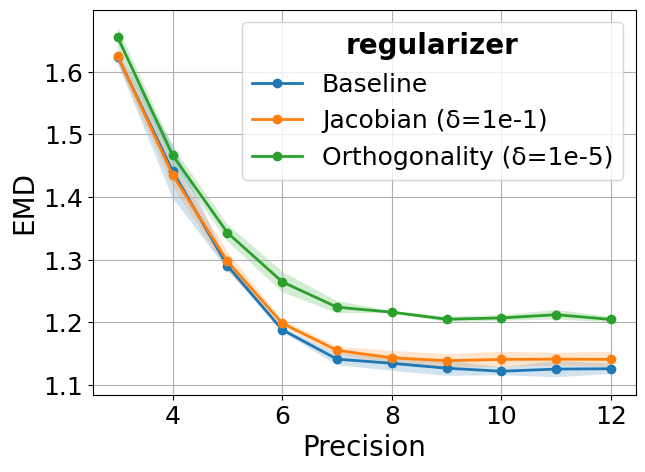

In [16]:
# select the feature
NOISE_TYPE = 'clean'
NOISE_MODULE = 0
selected_df = df[(df['noise_type'] == "clean") & 
                 (df['Noise module (%)'] == 0) & 
                 (df['regularizer'].isin(regularizer))]

plot_precision_vs_emd(selected_df, "regularizer", True, plot_legend=True)

Comparison on Gaussian noise:

--------------------------------------------------------------------------------
10


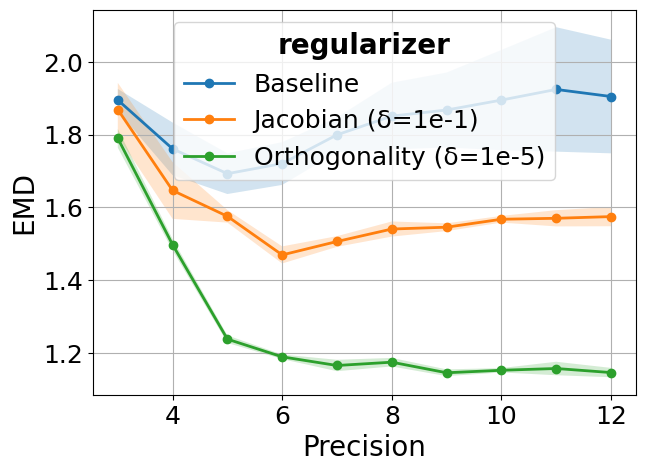

--------------------------------------------------------------------------------
15


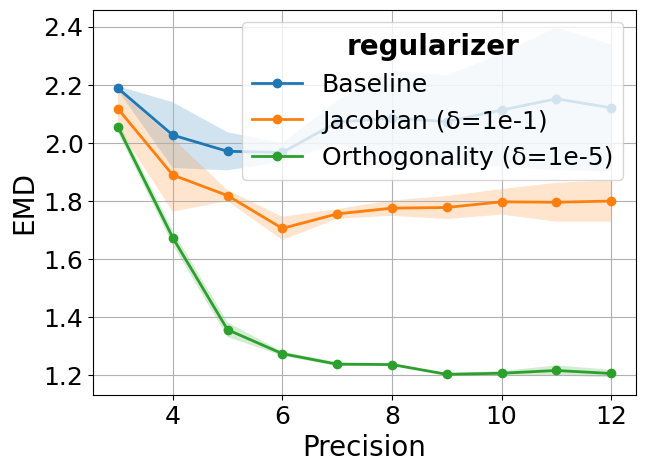

--------------------------------------------------------------------------------
20


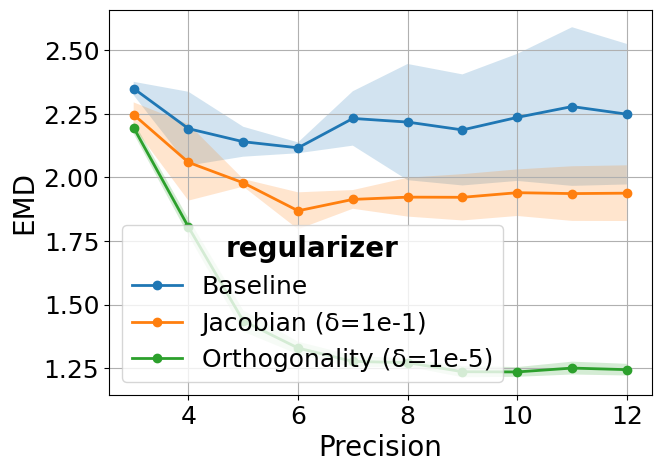

In [35]:
for module in [10, 15, 20]:
    selected_df = df[(df['noise_type'] == "gaussian") & 
                    (df['Noise module (%)'] == module) & 
                    (df['regularizer'].isin(regularizer))]
    print(80*"-")
    print(module)
    plot_precision_vs_emd(selected_df, "regularizer", True, plot_legend=True)

Comparison on Salt & Pepper noise:

--------------------------------------------------------------------------------
10


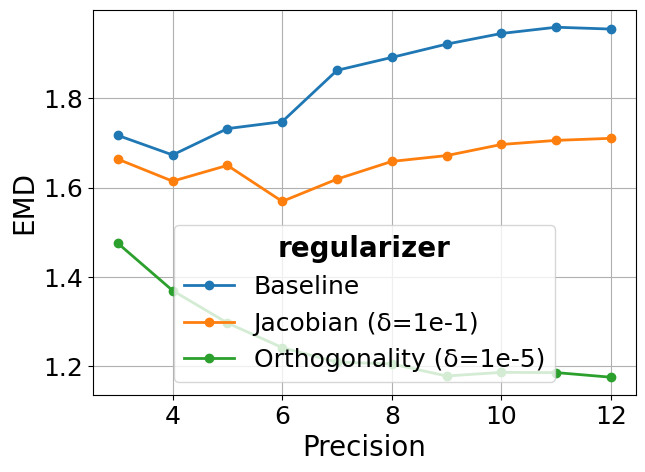

--------------------------------------------------------------------------------
15


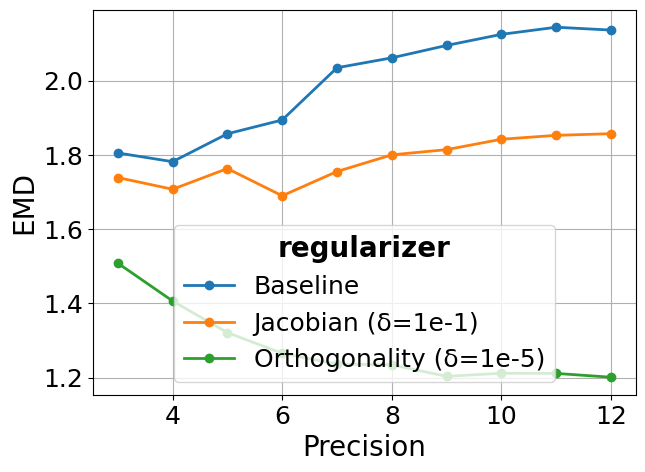

--------------------------------------------------------------------------------
20


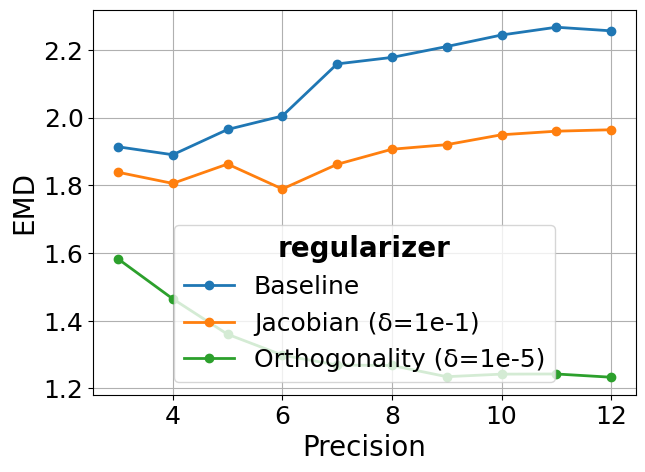

In [36]:
for module in [10, 15, 20]:
    selected_df = df[(df['noise_type'] == "salt_pepper") & 
                    (df['Noise module (%)'] == module) & 
                    (df['regularizer'].isin(regularizer))]
    print(80*"-")
    print(module)
    plot_precision_vs_emd(selected_df, "regularizer", False, plot_legend=True)

## Ablation studies

Testing different value of $\delta$ for the orthogonality regularization on clean and perturbed data:

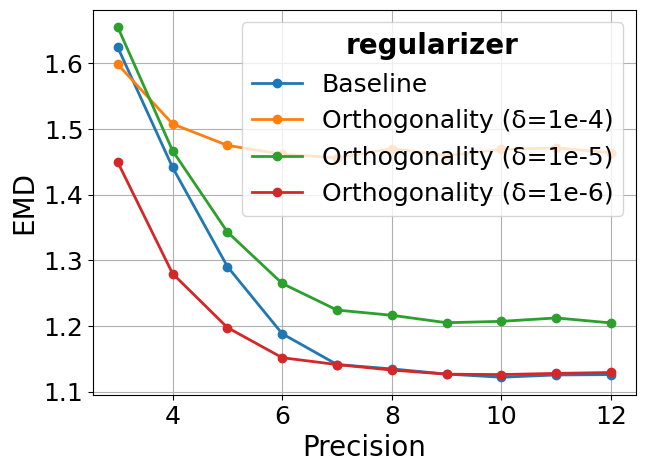

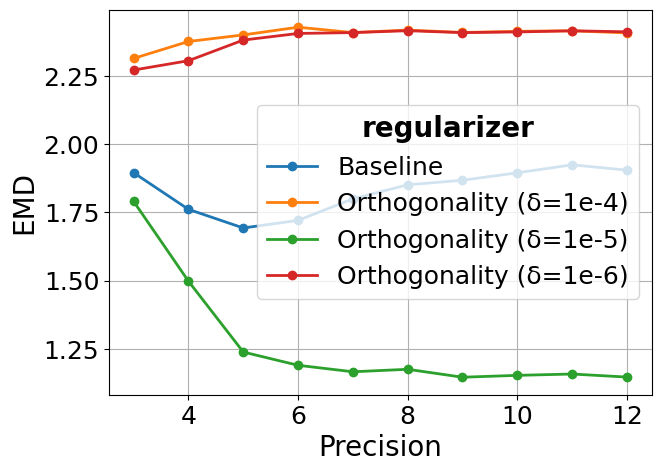

In [31]:
lip_reg = ["Baseline", "Orthogonality (δ=1e-4)", "Orthogonality (δ=1e-5)", "Orthogonality (δ=1e-6)"]

selected_df = df[(df['noise_type'] == "clean") & 
                 (df['Noise module (%)'] == 0) & 
                 (df['regularizer'].isin(lip_reg))]
plot_precision_vs_emd(selected_df, "regularizer", plot_legend=True)

selected_df = df[(df['noise_type'] == "gaussian") & 
                 (df['Noise module (%)'] == 10) & 
                 (df['regularizer'].isin(lip_reg))]
plot_precision_vs_emd(selected_df, "regularizer", plot_legend=True)

Testing different value of $\delta$ for the Jacobian regularization on clean and perturbed data:

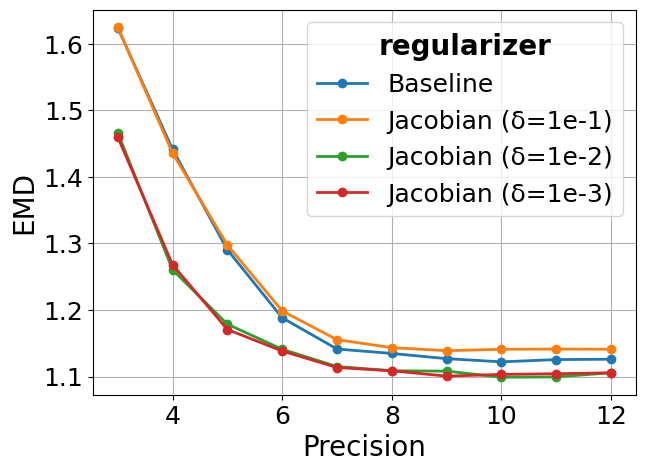

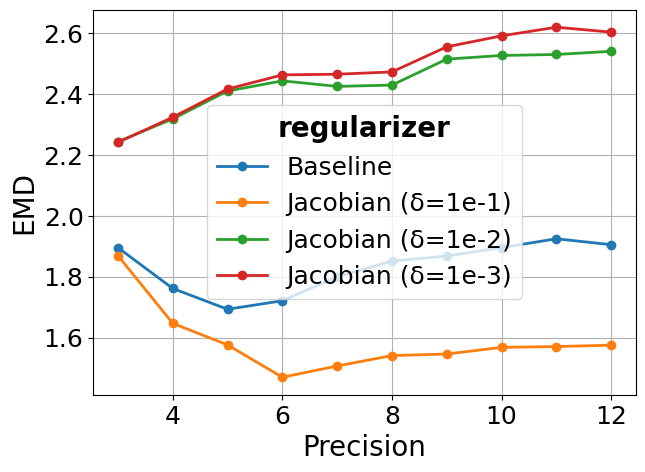

In [32]:
j_reg = ["Baseline", "Jacobian (δ=1e-1)", "Jacobian (δ=1e-2)", "Jacobian (δ=1e-3)"]

selected_df = df[(df['noise_type'] == "clean") & 
                 (df['Noise module (%)'] == 0) & 
                 (df['regularizer'].isin(j_reg))]
plot_precision_vs_emd(selected_df, "regularizer", plot_legend=True)
selected_df = df[(df['noise_type'] == "gaussian") & 
                 (df['Noise module (%)'] == 10) & 
                 (df['regularizer'].isin(j_reg))]
plot_precision_vs_emd(selected_df, "regularizer", plot_legend=True)

Ablation studies on the impact of noise module:

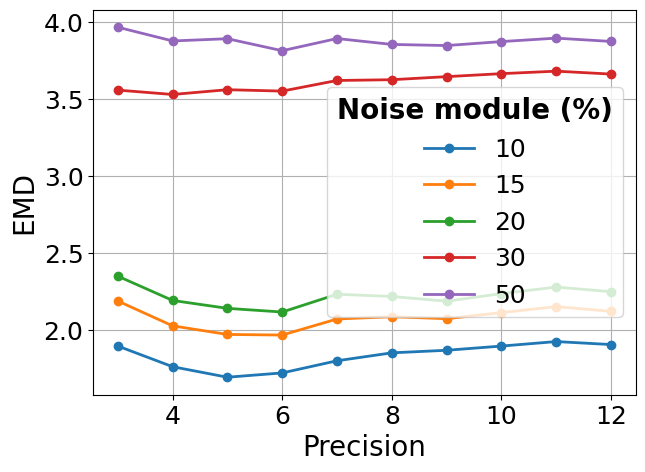

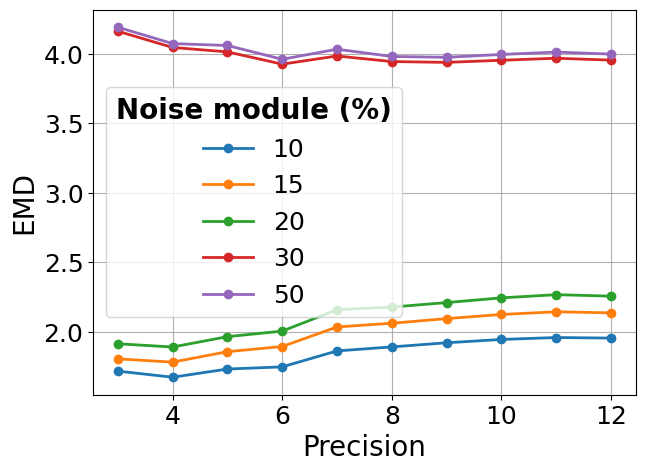

In [40]:
selected_df = df[(df['noise_type'] == 'gaussian') & 
                (df['Noise module (%)'].isin([10, 15, 20, 30, 50])) & 
                (df['regularizer'] == "Baseline")]

plot_precision_vs_emd(selected_df, "Noise module (%)", plot_legend=True)

selected_df = df[(df['noise_type'] == 'salt_pepper') & 
                (df['Noise module (%)'].isin([10, 15, 20, 30, 50])) & 
                (df['regularizer'] == "Baseline")]

plot_precision_vs_emd(selected_df, "Noise module (%)", plot_legend=True)

# Fusion model (Regression CNN)